# Measuring Distance

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','sp','geosphere')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"

[1] "Warning:   geosphere  is not an installed package"


In [2]:
#Read in point featureclass
ppoints <- readOGR("datasets/european_airports","EuropeanAirports2006")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/european_airports", layer: "EuropeanAirports2006"
with 1884 features
It has 10 fields


In [3]:
head(ppoints@data)

LONGITUDE,LATITUDE,CODE,NAME,CITY,COUNTRY,C_NAME,OUTFLOW,INFLOW,TOTALFLOW
-25170000,36970000,SMA,Vila Do Porto,Santa Maria,PT,Portugal,939.75,939.75,1879.50
-28720000,38520000,HOR,Horta,"Horta, Faial Is.",PT,Portugal,3026.50,3023.50,6050.00
-28330000,38470000,PIX,Pico Island,Pico Island,PT,Portugal,826.75,986.50,1813.25
-27090000,38760000,TER,Lajes,Terceira,PT,Portugal,6621.00,6424.25,13045.25
-25680000,37750000,PDL,Nordela,Ponta Delgada,PT,Portugal,9990.50,10149.00,20139.50
-23170000,64970000,GUU,Grundarf Jordur Airport,Grundarf Jordur,IS,Iceland,0.00,0.00,0.00


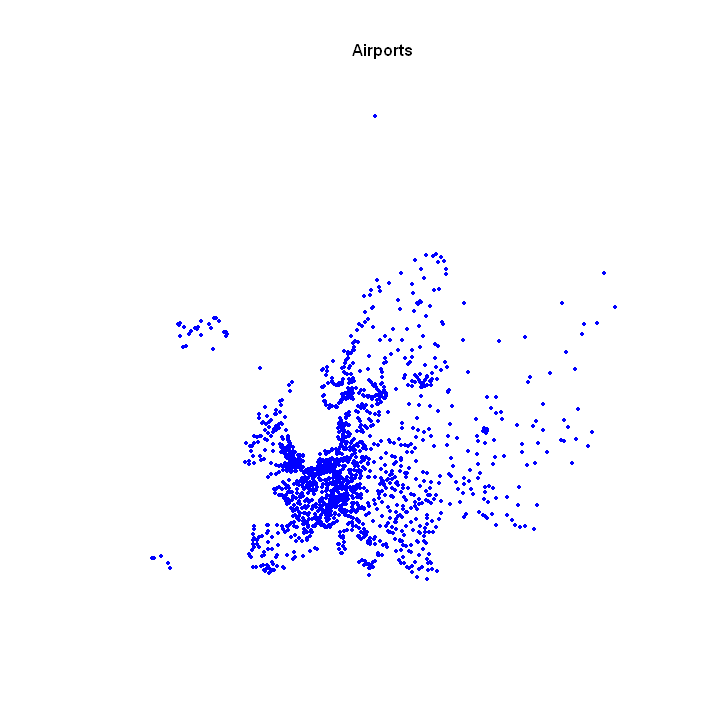

In [4]:
#Add the point features to the display

plot(ppoints, pch = 21, bg = "blue", col = "blue", 
         lwd = .5, cex = .4, main="Airports", cex.main = .8)

### Retrieve the CRS of the input point data

Retrieve the CRS associated with the input data. The proj4string() function is a subset of the is.projected() function. 

In [5]:
# Show projection system information
proj4string (ppoints)

[1] "+proj=merc +lon_0=0 +lat_ts=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"

### Select a Pair of Points

Let's select a pair of points that are relatively far apart.  One point is the airport coded 'AAH' while the other is the airport coded 'ZIL'. Plot these selected points relative to the others. Feel free to experiment with other point pairs after you complete this lab.

In [7]:
peek <- head(ppoints@data)
peek

LONGITUDE,LATITUDE,CODE,NAME,CITY,COUNTRY,C_NAME,OUTFLOW,INFLOW,TOTALFLOW
-25170000,36970000,SMA,Vila Do Porto,Santa Maria,PT,Portugal,939.75,939.75,1879.50
-28720000,38520000,HOR,Horta,"Horta, Faial Is.",PT,Portugal,3026.50,3023.50,6050.00
-28330000,38470000,PIX,Pico Island,Pico Island,PT,Portugal,826.75,986.50,1813.25
-27090000,38760000,TER,Lajes,Terceira,PT,Portugal,6621.00,6424.25,13045.25
-25680000,37750000,PDL,Nordela,Ponta Delgada,PT,Portugal,9990.50,10149.00,20139.50
-23170000,64970000,GUU,Grundarf Jordur Airport,Grundarf Jordur,IS,Iceland,0.00,0.00,0.00


In [8]:
data <- ppoints@data
head(data)

LONGITUDE,LATITUDE,CODE,NAME,CITY,COUNTRY,C_NAME,OUTFLOW,INFLOW,TOTALFLOW
-25170000,36970000,SMA,Vila Do Porto,Santa Maria,PT,Portugal,939.75,939.75,1879.50
-28720000,38520000,HOR,Horta,"Horta, Faial Is.",PT,Portugal,3026.50,3023.50,6050.00
-28330000,38470000,PIX,Pico Island,Pico Island,PT,Portugal,826.75,986.50,1813.25
-27090000,38760000,TER,Lajes,Terceira,PT,Portugal,6621.00,6424.25,13045.25
-25680000,37750000,PDL,Nordela,Ponta Delgada,PT,Portugal,9990.50,10149.00,20139.50
-23170000,64970000,GUU,Grundarf Jordur Airport,Grundarf Jordur,IS,Iceland,0.00,0.00,0.00


In [9]:
subset(data, CODE == "AAH")

,LONGITUDE,LATITUDE,CODE,NAME,CITY,COUNTRY,C_NAME,OUTFLOW,INFLOW,TOTALFLOW
1021,6130000,50750000,AAH,Aachen,Aachen,DE,Germany,0,0,0


In [10]:
subset(data, CODE == "ZIL")

,LONGITUDE,LATITUDE,CODE,NAME,CITY,COUNTRY,C_NAME,OUTFLOW,INFLOW,TOTALFLOW
1843,55620000,61990000,ZIL,Bus Service,Horsens,DK,Denmark,0,0,0


In [11]:
#select 2 points
selPtA <- ppoints[ppoints@data$CODE == 'AAH',]
selPtB <- ppoints[ppoints@data$CODE == 'ZIL',]

In [12]:
selPtA

             coordinates LONGITUDE LATITUDE CODE   NAME   CITY COUNTRY  C_NAME
1021 (682388.5, 6544081)   6130000 50750000  AAH Aachen Aachen      DE Germany
     OUTFLOW INFLOW TOTALFLOW
1021       0      0         0

In [13]:
selPtB

            coordinates LONGITUDE LATITUDE CODE        NAME    CITY COUNTRY
1843 (6191590, 8819010)  55620000 61990000  ZIL Bus Service Horsens      DK
      C_NAME OUTFLOW INFLOW TOTALFLOW
1843 Denmark       0      0         0

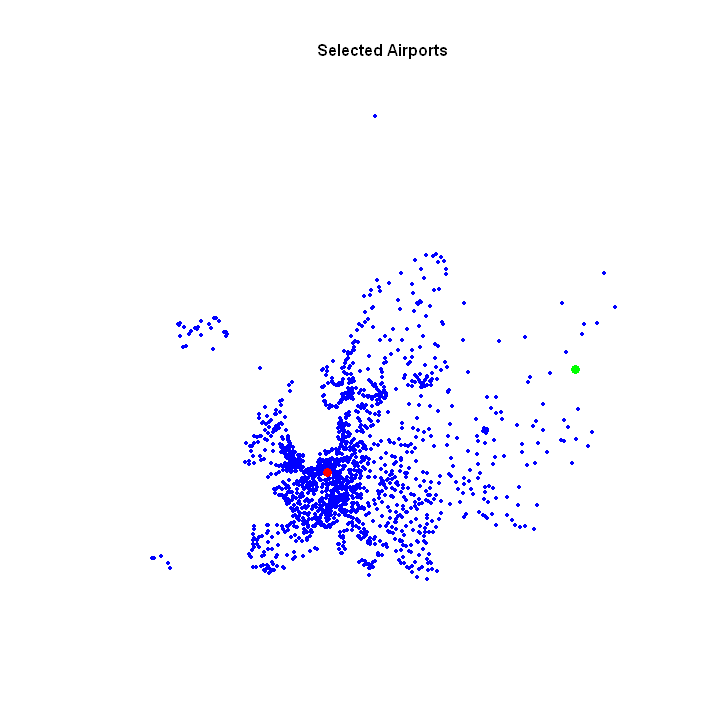

In [14]:
#plot selected features
plot(ppoints,bg="blue",col="blue",lwd=.5,
         cex=.4,pch=21,main="Selected Airports",cex.main=.8)

plot(selPtA,bg="red",col="red",
         lwd=.5,cex=1,pch=21,add=TRUE)

plot(selPtB,bg="green",col="green",lwd=.5,
         cex=1,pch=21,add=TRUE)

## Euclidean Distance

Euclidean distance is one of the simplist distance metrics to construct. Distance between points A and B just involves knowing the x and y coordinates of both points, subtracting and squaring the x coordinates, subtracting and squaring the y coordinates, summing the squared values, and then taking the square root of the sums. So, let's try that next.

In [15]:
#Get x and y coordinates of selected points
xA <- as.numeric(coordinates(selPtA)[,1])
yA <- as.numeric(coordinates(selPtA)[,2])
xB <- as.numeric(coordinates(selPtB)[,1])
yB <- as.numeric(coordinates(selPtB)[,2])

In [16]:
xA

[1] 682388.5

In [17]:
yA

[1] 6544081

In [18]:
xB

[1] 6191590

In [19]:
yB

[1] 8819010

In [20]:
#compute euclidean distance
EuclideanDist <- sqrt(((xA-xB)^2) +((yA-yB)^2))
paste('Euclidean Distance = ', toString(EuclideanDist))

[1] "Euclidean Distance =  5960419.75213106"

## Great Circle Distance

Let's try to compute a great circle distance. Great circle distances reflect the shortest path of moving between a pair of points along the surface of the Earth given that it's curvature is taken into consideration.  However, they typically assume that the surface is flat (i.e. no variation in elevation).  

There are actually many great circle distance metrics. Why? Well, there are many different opinions regarding the shape of the Earth. One great circle matrix can be based on the law of cosines assuming a spherical model of the Earth. The distCosine() function (geosphere library) can assist us with its computation. The required inputs are two point dataframes, 'r' the equatorial radius. Although the geosphere library requires data to be in lat/long coordinates, most of the other inputs/outputs are in meters.

### Sphere-based Great Circle

The simplist great circle distances assume a spherical model of the Earth. As such, they only require the Earth's radius in their computation. The law of cosines can be applied to compute a great circle distance.

In [22]:
proj4string(ppoints)

[1] "+proj=merc +lon_0=0 +lat_ts=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"

#### Transform CRS to Lat/Long

First, transform the points to lat/long in the WGS84 datum and reference ellipsoid. Next, try and re-compute the cosine great circle distance.  Is the great circle distance reported here different from the Euclidean distance reported earlier?  Yes, it's a lot less you say. How could a straight line be longer than a curved line? 

Remember, the prior data were projected in a global Mercator projection in meters....distances in the Mercator projection are only really accurate near the equator. As latitude increases/decreases, then distances become more distorted...have you ever seen the size of Greenland on a Mercator map? Thus, while distances between points that are close together can be somewhat reasonable, increases/decreases in latitude tend to distort distances between features that are more distant.

Therefore, it is very important to be mindful when making any distance computations of a dataset's CRS. It is even more important to be mindful about which CRS best fits a given need and how the computations of distance and/or area can be affected.  Choose wisely.  You'd be surprised about how much research has been conducted using biased measures of distance!

In [23]:
# Transform to wgs84
ppoints.wgs <- spTransform(ppoints, CRS("+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +nadgrids=@null"))
proj4string(ppoints.wgs)

[1] "+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +nadgrids=@null"

In [24]:
selPtA2 <- ppoints.wgs[ppoints.wgs@data$CODE == 'AAH',]
selPtB2 <- ppoints.wgs[ppoints.wgs@data$CODE == 'ZIL',]


In [25]:
selPtA

             coordinates LONGITUDE LATITUDE CODE   NAME   CITY COUNTRY  C_NAME
1021 (682388.5, 6544081)   6130000 50750000  AAH Aachen Aachen      DE Germany
     OUTFLOW INFLOW TOTALFLOW
1021       0      0         0

In [26]:
selPtA2

       coordinates LONGITUDE LATITUDE CODE   NAME   CITY COUNTRY  C_NAME
1021 (6.13, 50.75)   6130000 50750000  AAH Aachen Aachen      DE Germany
     OUTFLOW INFLOW TOTALFLOW
1021       0      0         0

In [27]:
selPtB

            coordinates LONGITUDE LATITUDE CODE        NAME    CITY COUNTRY
1843 (6191590, 8819010)  55620000 61990000  ZIL Bus Service Horsens      DK
      C_NAME OUTFLOW INFLOW TOTALFLOW
1843 Denmark       0      0         0

In [28]:
selPtB2

        coordinates LONGITUDE LATITUDE CODE        NAME    CITY COUNTRY  C_NAME
1843 (55.62, 61.99)  55620000 61990000  ZIL Bus Service Horsens      DK Denmark
     OUTFLOW INFLOW TOTALFLOW
1843       0      0         0

In [29]:
#compute great circle distance
cosinedist <- distCosine(selPtA2, selPtB2, r=6378137)
paste('Law of Cosine Great Circle Distance = ',toString(cosinedist))

ERROR: Error in distCosine(selPtA2, selPtB2, r = 6378137): could not find function "distCosine"


### Visualize the Great Circle

The approximate trajectory of a great circle can be obtained using the greatCircle() function (geosphere library). The required inputs are two point spatial dataframes, the number of great circle points to create 'n', and whether or not to generate a line feature 'sp'. 

In [30]:
#compute great circle line
gc <- greatCircle(selPtA2, selPtB2, n=360, sp=TRUE)

#plot results
plot(ppoints.wgs,bg="blue",col="blue",lwd=.5,
     cex=.4,pch=21,main="Great Circle Arc",cex.main=.8)

plot(selPtA2,bg="red",col="red",lwd=.5,
     cex=1,pch=21,add=TRUE)

plot(selPtB2,bg="green",col="green",lwd=.5,
     cex=1,pch=21,add=TRUE)

plot(gc,col='orange',add=TRUE)

ERROR: Error in greatCircle(selPtA2, selPtB2, n = 360, sp = TRUE): could not find function "greatCircle"


### Other Spherical Great Circle Distances

Here are a few other great circle measures that are based on a spherical model of the Earth. Do a little research about them and take a look at the geosphere library documentation to learn more.

In [31]:
vincsphdist <- distVincentySphere(selPtA2, selPtB2, r=6378137)
paste('Vincenty Great Circle = ',toString(vincsphdist))

ERROR: Error in distVincentySphere(selPtA2, selPtB2, r = 6378137): could not find function "distVincentySphere"


In [32]:
haverdist <- distHaversine(selPtA2, selPtB2, r=6378137)
paste('Haversine Great Circle = ',toString(haverdist))

ERROR: Error in distHaversine(selPtA2, selPtB2, r = 6378137): could not find function "distHaversine"


## Geodetic Great Circles

Geodetic great circle measures compute distance based upon a more refined model of the Earth. Instead of assuming a spherical model and only requiring the radius of the Earth, they are typically based upon a reference ellipsoid, which requires making some assumption about how the ellipsoid 'flattens' from the equator to the poles. Below is a list of equatorial radius and flattening coefficients associated with commonly used ellipsoids as taken from the geosphere documentation.

-WGS84 6378137 1/298.257223563

-GRS80 6378137 1/298.257222101

-GRS67 6378160 1/298.25

-Airy 1830 6377563.396 1/299.3249646

-Bessel 1841 6377397.155 1/299.1528434

-Clarke 1880 6378249.145 1/293.465

-Clarke 1866 6378206.4 1/294.9786982

-International 1924 6378388 1/297

-Krasovsky 1940 6378245 1/298.2997381


Let's apply a few geodetic great circle computations.  See how close the WGS84 and GRS80 datums really are!!

Of course, feel free to experiment a little here.

In [33]:
#wgs84
wgs84dist <- distGeo(selPtA2, selPtB2, a=6378137, f=1/298.257223563)
paste('WGS84 Geodetic Great Circle = ',toString(wgs84dist))

#grs80
grs80dist <- distGeo(selPtA2, selPtB2, a=6378137, f=1/298.257222101)
paste('GRS80 Geodetic Great Circle = ',toString(grs80dist))

#international 1924
int24dist <- distGeo(selPtA2, selPtB2, a=6378388, f=1/297)
paste('International 1924 Geodetic Great Circle = ',toString(int24dist))

#Meeus's method
meeusdist <- distMeeus(selPtA2, selPtB2, a=6378137, f=1/298.257223563)
paste('Meeus Geodetic Great Circle = ',toString(meeusdist))

#Vincenty method
vincdist <- distVincentyEllipsoid(selPtA2, selPtB2, a=6378137, b=6356752.3142, f=1/298.257223563)
paste('Vincenty Geodetic Great Circle = ',toString(vincdist))

ERROR: Error in distGeo(selPtA2, selPtB2, a = 6378137, f = 1/298.257223563): could not find function "distGeo"


## Back to Euclidean Distance

Remember that when we tried to compute Euclidean distance earlier using the Mercator CRS the distances were very high? Let's fix that before we end this lab. First, let's transform the CRS into something a little more appropriate for Europe (where the airports are located). One such CRS could be an equidistant conic projection. Now, it would be tough to sort through proj4 to look for this projection as applied to Europe. As such, we could look and see if anyone else may have posted proj4 CRS specifications for such a projection.

For example, http://spatialreference.org/about/ provides an interesting user interface that allows one to search for CRS that have been defined by others. There are user submitted definitions here. However, there are also some commonly used ones such as those defined by ESRI and EPSG.  Head to http://spatialreference.org/ref/esri/ to ESRIs CRSs. Forward through a few pages until you see http://spatialreference.org/ref/esri/102031/.  In the working pane on this page, you can have this CRS produced in a variety of formats - i.e. ESRI .shp .prj file, gml, and even the proj4 format we are working with here. So, all I did was select proj4 format and copy the result from that into the code below.

In [36]:
# Transform to wgs84
ppoints.edc <- spTransform(ppoints, 
                           CRS("+proj=eqdc +lat_0=0 +lon_0=0 +lat_1=43 +lat_2=62 +x_0=0 +y_0=0 +ellps=intl +units=m +no_defs"))

selPtA3 <- ppoints.edc[ppoints.edc@data$CODE == 'AAH',]
selPtB3 <- ppoints.edc[ppoints.edc@data$CODE == 'ZIL',]

### Compute Euclidean Distance

Now we should be able to compute Euclidean distance in a more meaningful way.  The result should now be more on par with the great circle distances...that is less than, not more than.

In [35]:
#Get x and y coordinates of selected points
xA3 <- as.numeric(coordinates(selPtA3)[,1])
yA3 <- as.numeric(coordinates(selPtA3)[,2])
xB3 <- as.numeric(coordinates(selPtB3)[,1])
yB3 <- as.numeric(coordinates(selPtB3)[,2])

#compute euclidean distance
EuclideanDist3 <- sqrt(((xA3-xB3)^2) +((yA3-yB3)^2))
paste('Euclidean Distance = ',toString(EuclideanDist3))

[1] "Euclidean Distance =  3188897.95116728"